In [2]:
import pandas as pd
import numpy as np

# Wczytanie danych
data = pd.read_csv('alzheimer_wersja1.csv', sep=';', decimal=',')

In [3]:
print(data)

      Age  Gender    BMI  Smoking  AlcoholConsumption  PhysicalActivity  \
0      73       0  22.93        0                13.3               6.3   
1      89       0  26.83        0                 4.5               7.6   
2      73       0  17.80        0                19.6               7.8   
3      74       1  33.80        1                12.2               8.4   
4      89       0  20.72        0                18.5               6.3   
...   ...     ...    ...      ...                 ...               ...   
2144   61       0  39.12        0                 1.6               4.0   
2145   75       0  17.86        0                18.8               1.4   
2146   77       0  15.48        0                 4.6               9.9   
2147   78       1  15.30        0                 8.7               6.4   
2148   72       0  33.29        0                 7.9               6.6   

      FamilyHistoryAlzheimers  CholesterolTotal  MemoryComplaints  \
0                           0 

In [6]:
# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Statystyki opisowe
print(data.describe())

Age                          0
Gender                       0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
FamilyHistoryAlzheimers      0
CholesterolTotal             0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
dtype: int64
               Age       Gender          BMI      Smoking  AlcoholConsumption  \
count  2149.000000  2149.000000  2149.000000  2149.000000         2149.000000   
mean     74.908795     0.506282    27.655617     0.288506           10.039134   
std       8.990221     0.500077     7.217267     0.453173            5.758861   
min      60.000000     0.000000    15.010000     0.000000            0.000000   
25%      67.000000     0.000000    21.610000     0.000000            5.100000   
50%      75.000000     1.000000    27.820000     0.000000          

In [3]:
# Ustalenie ziarna
indices = [123456, 234567, 345678]  # Przykładowe numery indeksów
seed = int(np.floor(np.mean(indices)))
np.random.seed(seed)

# Podział na zbiór uczący i testowy (70%/30%)
from sklearn.model_selection import train_test_split
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

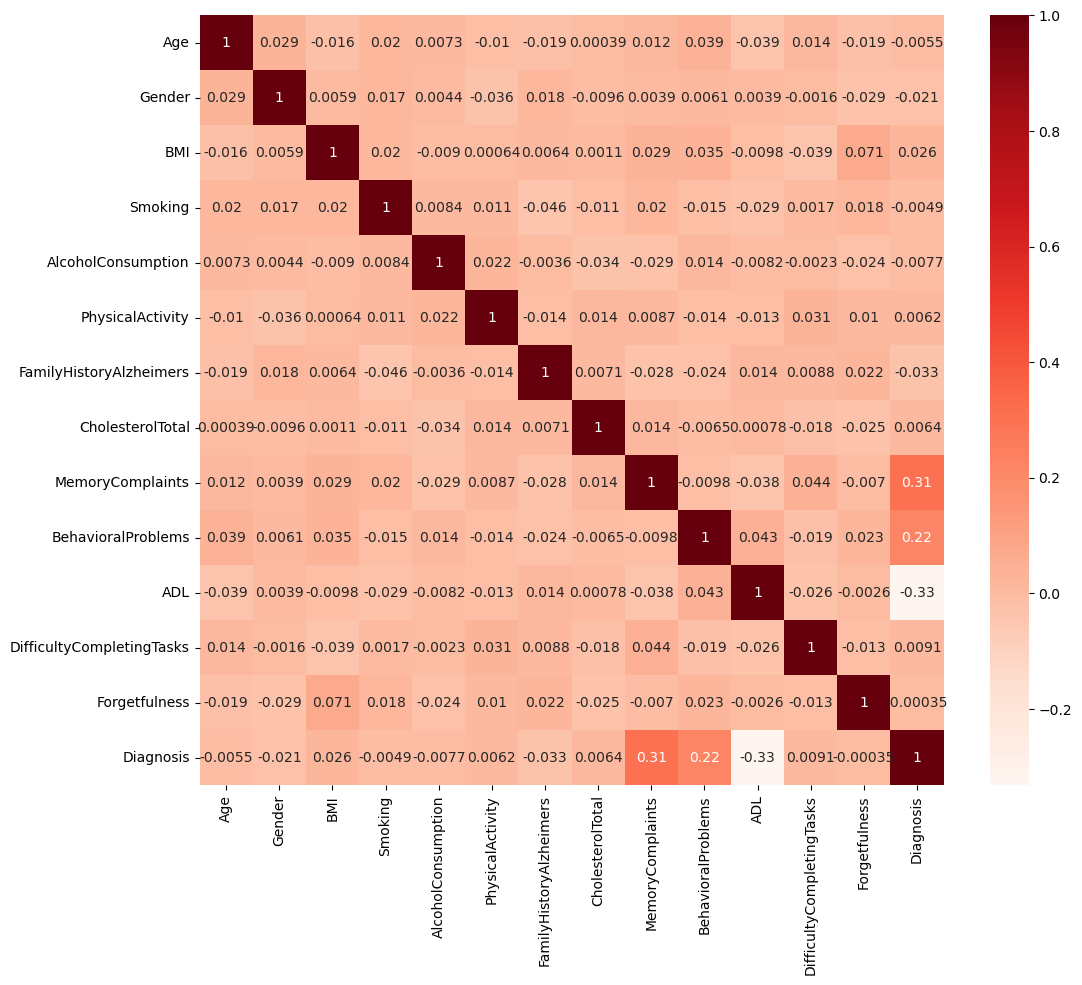

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Standaryzacja danych i budowa modelu
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=seed))
])

# Hiperparametry do strojenia
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50,50)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive']
}

# Wyszukiwanie siatkowe
mlp_grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)
mlp_grid.fit(X_train, y_train)

# Najlepsze parametry
print(mlp_grid.best_params_)

{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant'}


c:\Users\Franciszek Szary\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Budowa modelu
rf = RandomForestClassifier(random_state=seed)

# Hiperparametry
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Wyszukiwanie siatkowe
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Najlepsze parametry
print(rf_grid.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


MLP Classifier:
Train set:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       991
           1       0.75      0.61      0.67       513

    accuracy                           0.80      1504
   macro avg       0.78      0.75      0.76      1504
weighted avg       0.79      0.80      0.79      1504

Test set:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       398
           1       0.61      0.50      0.55       247

    accuracy                           0.69       645
   macro avg       0.67      0.65      0.66       645
weighted avg       0.68      0.69      0.68       645

Train ROC AUC: 0.8684
Test ROC AUC: 0.7703


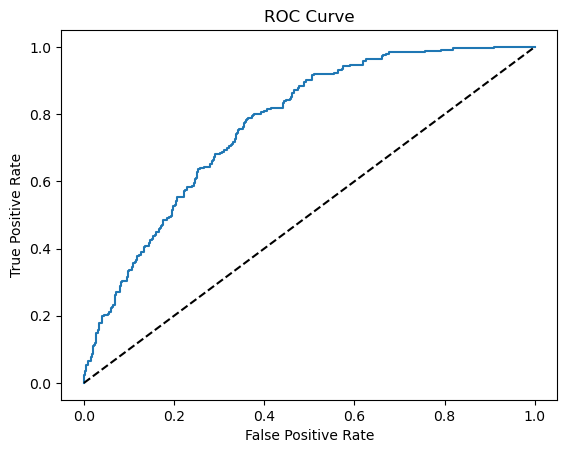

Random Forest Classifier:
Train set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       991
           1       1.00      0.97      0.98       513

    accuracy                           0.99      1504
   macro avg       0.99      0.98      0.99      1504
weighted avg       0.99      0.99      0.99      1504

Test set:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       398
           1       0.68      0.51      0.58       247

    accuracy                           0.72       645
   macro avg       0.71      0.68      0.69       645
weighted avg       0.72      0.72      0.71       645

Train ROC AUC: 0.9999
Test ROC AUC: 0.7927


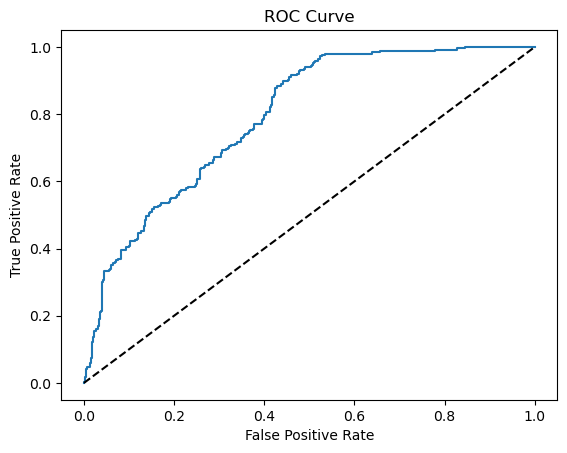

In [12]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Funkcja do oceny modeli
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predykcje
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Raport klasyfikacji
    print("Train set:")
    print(classification_report(y_train, y_train_pred))
    print("Test set:")
    print(classification_report(y_test, y_test_pred))
    
    # ROC AUC
    y_train_proba = model.predict_proba(X_train)[:,1]
    y_test_proba = model.predict_proba(X_test)[:,1]
    print(f"Train ROC AUC: {roc_auc_score(y_train, y_train_proba):.4f}")
    print(f"Test ROC AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
    
    # Krzywa ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

# Ocena MLP
print("MLP Classifier:")
evaluate_model(mlp_grid.best_estimator_, X_train, y_train, X_test, y_test)

# Ocena Random Forest
print("Random Forest Classifier:")
evaluate_model(rf_grid.best_estimator_, X_train, y_train, X_test, y_test)

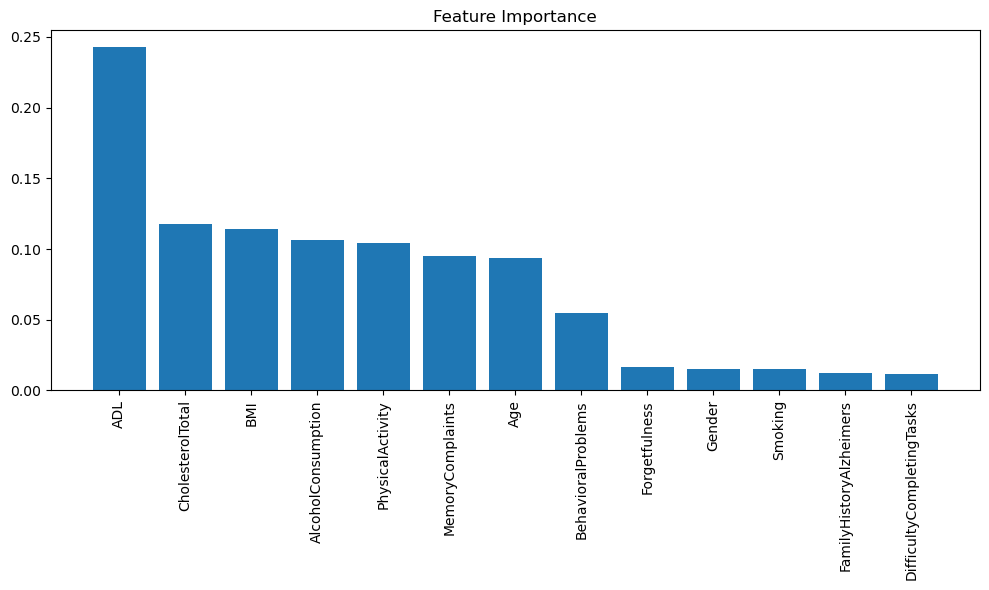

In [13]:
# Ważność cech
importances = rf_grid.best_estimator_.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Wykres
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()